<a href="https://colab.research.google.com/github/KunjShah95/furniture-object-detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --upgrade pip
%pip install ultralytics
%pip install opencv-python-headless==4.11.0.86 httpx==0.28.1 protobuf==6.31.1 requests==2.32.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [ultralytics]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 73.3 MB/s  0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python-headless]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installe

In [ ]:
!wget -O homeobjects-3K.zip https://github.com/ultralytics/assets/releases/download/v0.0.0/homeobjects-3K.zip
!unzip homeobjects-3K.zip -d /content/homeobjects-3K
!ls -la /content/homeobjects-3K

Streaming output truncated to the last 5000 lines.
  inflating: /content/homeobjects-3K/labels/train/living_room_1411.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1412.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1414.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1415.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1416.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1417.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1418.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1419.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_142.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1420.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1421.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1422.txt  
  inflating: /content/homeobjects-3K/labels/train/living_room_1424.txt  
 

In [ ]:
dataset_yaml='''
path: homeobjects-3K
train: images/train
val: images/val
nc: 12
names:
  0: bed
  1: sofa
  2: chair
  3: table
  4: lamp
  5: tv
  6: laptop
  7: wardrobe
  8: window
  9: door
  10: potted plant
  11: photo frame
'''
with open('homeobjects3k_dataset.yaml','w') as f:
	f.write(dataset_yaml)
print('Saved: homeobjects3k_dataset.yaml')
print(open('homeobjects3k_dataset.yaml').read())

Saved: homeobjects3k_dataset.yaml

path: homeobjects-3K
train: images/train
val: images/val
nc: 12
names:
  0: bed
  1: sofa
  2: chair
  3: table
  4: lamp
  5: tv
  6: laptop
  7: wardrobe
  8: window
  9: door
  10: potted plant
  11: photo frame



In [ ]:
import os, glob
root='/content/homeobjects-3K'
print('folders:', os.listdir(root))
print('train images:', len(glob.glob(root + '/images/train/*')))
print('val images:', len(glob.glob(root + '/images/val/*')))
# show a sample label
sample_label = glob.glob(root + '/labels/train/*.txt')[0]
print('sample label file:', sample_label)
print(open(sample_label).read())

folders: ['images', 'HomeObjects-3K.yaml', 'labels', 'LICENSE.txt']
train images: 2285
val images: 404
sample label file: /content/homeobjects-3K/labels/train/living_room_223.txt
5 0.5375119 0.4340978 0.3558088 0.3931602
7 0.5432099 0.7675518 0.4811649 0.3278212
10 0.1506806 0.7062656 0.299625 0.5036309
11 0.04451196 0.1831627 0.08728781 0.3632362



In [ ]:
!yolo detect train model=yolov8s.pt data=/content/homeobjects3k_dataset.yaml epochs=40 imgsz=640 batch=16 project=/content/YOLO_homeobjects3k name=exp1

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/homeobjects3k_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, 

In [ ]:
ls -la /content/YOLO_homeobjects3k/exp1

total 8944
drwxr-xr-x 3 root root   4096 Sep 14 05:04 ./
drwxr-xr-x 3 root root   4096 Sep 14 04:23 ../
-rw-r--r-- 1 root root   1578 Sep 14 04:23 args.yaml
-rw-r--r-- 1 root root 422013 Sep 14 05:04 BoxF1_curve.png
-rw-r--r-- 1 root root 382598 Sep 14 05:04 BoxP_curve.png
-rw-r--r-- 1 root root 327392 Sep 14 05:04 BoxPR_curve.png
-rw-r--r-- 1 root root 374533 Sep 14 05:04 BoxR_curve.png
-rw-r--r-- 1 root root 293636 Sep 14 05:04 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 244302 Sep 14 05:04 confusion_matrix.png
-rw-r--r-- 1 root root 203187 Sep 14 04:23 labels.jpg
-rw-r--r-- 1 root root   5190 Sep 14 05:04 results.csv
-rw-r--r-- 1 root root 308476 Sep 14 05:04 results.png
-rw-r--r-- 1 root root 608733 Sep 14 04:23 train_batch0.jpg
-rw-r--r-- 1 root root 646477 Sep 14 04:23 train_batch1.jpg
-rw-r--r-- 1 root root 616437 Sep 14 04:23 train_batch2.jpg
-rw-r--r-- 1 root root 472809 Sep 14 04:54 train_batch4290.jpg
-rw-r--r-- 1 root root 476653 Sep 14 04:54 train_batch4291.jpg


In [ ]:
!yolo val model=/content/YOLO_homeobjects3k/exp1/weights/best.pt data=/content/homeobjects3k_dataset.yaml imgsz=640

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3741.8±977.4 MB/s, size: 156.0 KB)
val: Scanning /content/homeobjects-3K/labels/val.cache... 404 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 404/404 7.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 26/26 3.2it/s 8.1s
                   all        404       3470      0.743      0.684       0.74      0.549
                   bed         22         22      0.773      0.727      0.791      0.619
                  sofa        286        398      0.852      0.834      0.886      0.688
                 chair        154        305      0.753      0.764      0.772      0.547
                 table        300        469      0.795      0.755      0.825       0.63
                  lamp        199        3


image 1/1 /content/homeobjects-3K/images/val/living_room_896.jpg: 1280x960 1 lamp, 1 wardrobe, 3 photo frames, 43.0ms
Speed: 11.3ms preprocess, 43.0ms inference, 119.8ms postprocess per image at shape (1, 3, 1280, 960)
Saved: /content/room_out.jpg


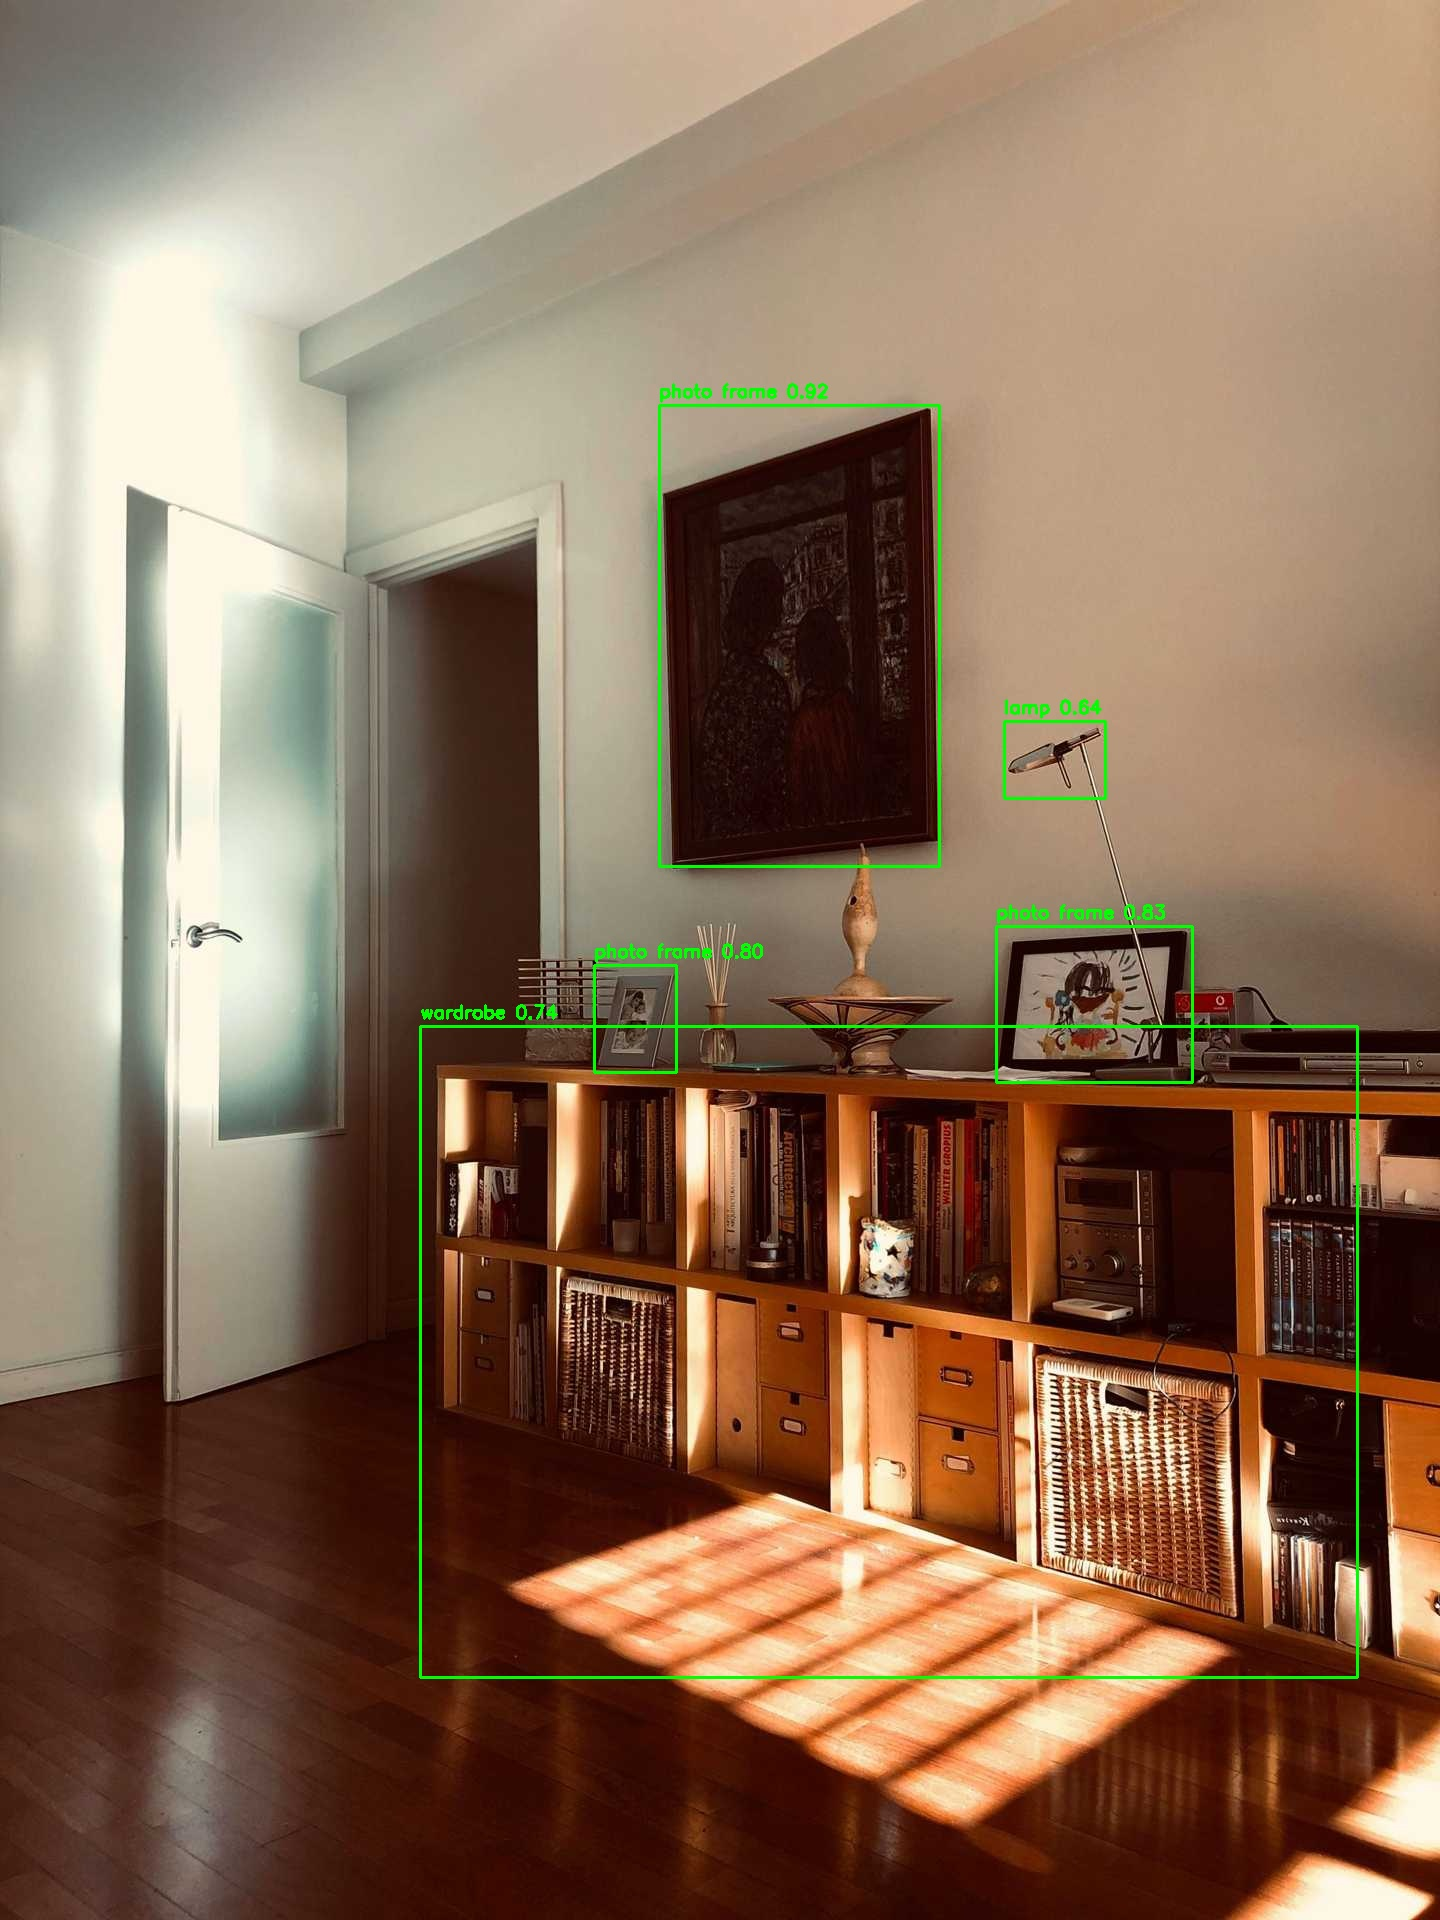

In [ ]:
from ultralytics import YOLO
import cv2
import os


model = YOLO('/content/YOLO_homeobjects3k/exp1/weights/best.pt')
# pick a sample image (or upload your own)
sample_img = '/content/homeobjects-3K/images/val/living_room_896.jpg' # change to an existing file if needed


results = model.predict(sample_img, imgsz=1280, conf=0.25, iou=0.45)
img = cv2.imread(sample_img)


if len(results) > 0 and results[0].boxes is not None:
    for box in results[0].boxes:
        x1,y1,x2,y2 = map(int, box.xyxy[0].tolist())
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        label = f"{model.names[cls]} {conf:.2f}"
        cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
        cv2.putText(img, label, (x1, max(15,y1-8)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    out_path = '/content/room_out.jpg'
    cv2.imwrite(out_path, img)
    print('Saved:', out_path)
    from IPython.display import Image, display
    display(Image(out_path))
else:
    print('No detections')

In [ ]:
import os

image_dir = '/content/homeobjects-3K/images/val/'
# List up to 10 files in the directory
for i, filename in enumerate(os.listdir(image_dir)):
    if i < 10:
        print(os.path.join(image_dir, filename))
    else:
        break

/content/homeobjects-3K/images/val/living_room_896.jpg
/content/homeobjects-3K/images/val/living_room_408.jpg
/content/homeobjects-3K/images/val/living_room_958.jpg
/content/homeobjects-3K/images/val/living_room_99.jpg
/content/homeobjects-3K/images/val/living_room_866.jpg
/content/homeobjects-3K/images/val/living_room_1032.jpg
/content/homeobjects-3K/images/val/living_room_1p (369).jpg
/content/homeobjects-3K/images/val/living_room_440.jpg
/content/homeobjects-3K/images/val/living_room_291.jpg
/content/homeobjects-3K/images/val/living_room_1p (284).jpg


In [ ]:
!yolo export model=/content/YOLO_homeobjects3k/exp1/weights/best.pt format=onnx
!ls -la

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/YOLO_homeobjects3k/exp1/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 16, 8400) (21.5 MB)

ONNX: starting export with onnx 1.19.0 opset 19...
ONNX: slimming with onnxslim 0.1.68...
ONNX: export success ✅ 1.8s, saved as '/content/YOLO_homeobjects3k/exp1/weights/best.onnx' (42.7 MB)

Export complete (2.7s)
Results saved to /content/YOLO_homeobjects3k/exp1/weights
Predict:         yolo predict task=detect model=/content/YOLO_homeobjects3k/exp1/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/YOLO_homeobjects3k/exp1/weights/best.onnx imgsz=640 data=/content/homeobjects3k_dataset.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export
total 427784
drwxr-xr-x 1 root root      4096 S

In [ ]:
!mkdir -p /content/drive/MyDrive/homeobjects3k_runs/exp1
!cp -r /content/YOLO_homeobjects3k/exp1 /content/drive/MyDrive/homeobjects3k_runs/exp1
!echo 'Copied runs to Drive: /content/drive/MyDrive/homeobjects3k_runs/exp1'

Copied runs to Drive: /content/drive/MyDrive/homeobjects3k_runs/exp1


In [ ]:
from google.colab import files
files.download('/content/YOLO_homeobjects3k/exp1/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/YOLO_homeobjects3k/exp1/weights/best.pt /content/drive/MyDrive/best_homeobjects3k.pt
